# 낮은 점수의 리뷰에서 불만의 원인

In [33]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
pd.set_option('display.max_colwidth', None)

In [34]:
bronze_reviews_df, _ = get_dataset(BronzeDataName.ORDER_REVIEWS)
bronze_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [35]:
FILTER_SCORE = 1

filtered_reviews_by_score_df = bronze_reviews_df[bronze_reviews_df.review_score == FILTER_SCORE]
filtered_reviews_by_score_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,,,2018-04-13 00:00:00,2018-04-16 00:39:37
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
29,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,,Não gostei ! Comprei gato por lebre,2017-12-13 00:00:00,2017-12-16 07:14:07
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,,"Sempre compro pela Internet e a entrega ocorre antes do prazo combinado, que acredito ser o prazo máximo. No stark o prazo máximo já se esgotou e ainda não recebi o produto.",2018-04-08 00:00:00,2018-04-09 12:22:39
39,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,,Nada de chegar o meu pedido.,2017-04-21 00:00:00,2017-04-23 05:37:03


In [36]:
print(filtered_reviews_by_score_df['review_id'].shape[0] == filtered_reviews_by_score_df.drop_duplicates()['review_id'].shape[0])
print(filtered_reviews_by_score_df['review_id'].shape[0])

True
11424


In [37]:
eng_reviews_df, _ = get_dataset(SilverDataName.ENG_REVIEWS_WITH_SENTI)
eng_reviews_df.head()

,review_id,column_name,sentimentality,por2eng
0,11eb20303bc6c13c41eeb1496e64aa97,review_comment_message,negative,"I did not receive the product, the product is listed as sent to the post office in Ribeirão Preto. The post office did not receive the product. I sent several messages to Targaryen and did not get a response. This Targaryen is ruining their name"
1,3c7388d3ed1f8a85fa544ef226af7605,review_comment_message,negative,"I bought 2 backpacks from the lannister site and from different partners. targaryen from mg delivered well before the estimated deadline, while the other one from pacific that comes from sc still hasn’t been delivered. congratulations to targaryen"
2,c6db613e18ea44aa7d2cc3257335c378,review_comment_message,negative,"I bought the product trusting the lannister stores and not the targaryen one which seems to not have delivered the product on time to the post office, and I did not receive any clarification from the targaryen, but the product arrived, thank you"
3,ae5917d1285e687b6b5b04d98c7d7f57,review_comment_message,negative,"I received the product, but the packaging and lack of the authenticity seal did not make me feel comfortable. I requested the exchange and sent it, they canceled the exchange already with the products on their way to targaryen I demand the refund of $"
4,5bba289164520198eae4a3d70824ab21,review_comment_message,negative,"as soon as I made the order I noticed that I had ordered the wrong product and immediately asked for the order to be cancelled but I did not receive a response from targaryen, I have already made more than 10 requests for a refund but they do not respond"


In [38]:
filterd_eng_reviews_df = eng_reviews_df[eng_reviews_df.review_id.isin(filtered_reviews_by_score_df['review_id'])]
filterd_eng_reviews_df.head()

,review_id,column_name,sentimentality,por2eng
0,11eb20303bc6c13c41eeb1496e64aa97,review_comment_message,negative,"I did not receive the product, the product is listed as sent to the post office in Ribeirão Preto. The post office did not receive the product. I sent several messages to Targaryen and did not get a response. This Targaryen is ruining their name"
2,c6db613e18ea44aa7d2cc3257335c378,review_comment_message,negative,"I bought the product trusting the lannister stores and not the targaryen one which seems to not have delivered the product on time to the post office, and I did not receive any clarification from the targaryen, but the product arrived, thank you"
3,ae5917d1285e687b6b5b04d98c7d7f57,review_comment_message,negative,"I received the product, but the packaging and lack of the authenticity seal did not make me feel comfortable. I requested the exchange and sent it, they canceled the exchange already with the products on their way to targaryen I demand the refund of $"
4,5bba289164520198eae4a3d70824ab21,review_comment_message,negative,"as soon as I made the order I noticed that I had ordered the wrong product and immediately asked for the order to be cancelled but I did not receive a response from targaryen, I have already made more than 10 requests for a refund but they do not respond"
5,cb4f3576229c52f08a7cc8ee6ab8da7c,review_comment_message,negative,I made this purchase by baratheon I bought a set of maternity bags it says it would be delivered by targaryen so far it has not arrived. I bought it in the same purchase and the chandeliers have already arrived even before the deadline


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jmhwang/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jmhwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jmhwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jmhwang/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


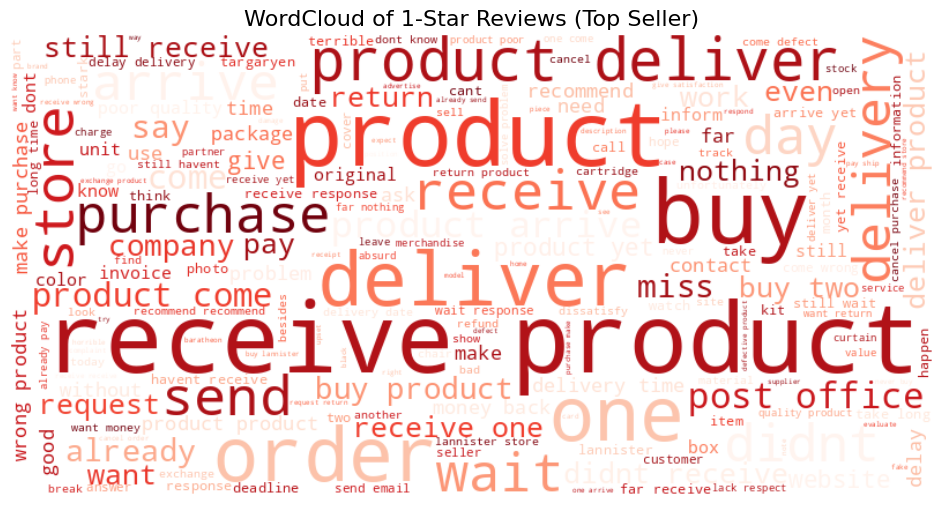

In [39]:
# Import libraries
import re
import sys
import nltk

from wordcloud import WordCloud
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# # Setup NLTK data path (if needed)
# nltk.data.path.append('/home/jmhwang/nltk_data')
# sys.path.append("/home/jmhwang/nltk_data")

# Initialize components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define functions
def lemmatize_tokens(tokens):
    """Apply lemmatization to tokens"""
    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]

def preprocess(text):
    """Preprocess text: lowercase, remove non-alphabetic chars, tokenize, remove stopwords, lemmatize"""
    if not isinstance(text, str):
        return ''
    
    # Convert to lowercase and remove non-alphabetic characters
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and short words
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    
    # Lemmatize
    tokens = lemmatize_tokens(tokens)
    
    return ' '.join(tokens)

# Process text data
text_corpus = filterd_eng_reviews_df['por2eng'].dropna().apply(preprocess).str.cat(sep=' ')

# Generate word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='Reds'
).generate(text_corpus)

# Visualize
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of 1-Star Reviews (Top Seller)", fontsize=16)
plt.show()

In [40]:
from collections import Counter

# 모든 토큰 모으기
tokens = text_corpus.split()

# 빈도 계산
word_freq = Counter(tokens)
len(word_freq)

4337

In [ ]:
# 상위 20개 키워드 추출
top_words = word_freq.most_common(20)
top_words = top_words[1:]   # top_words[0] == 'product'


In [47]:
words, freqs = zip(*top_words)

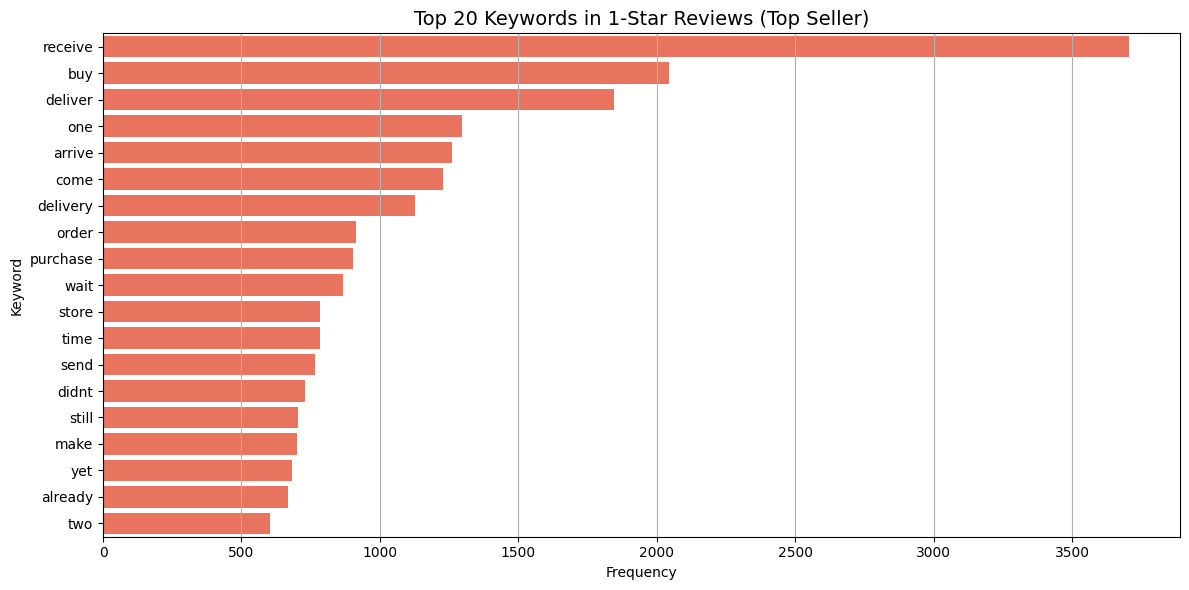

In [48]:

plt.figure(figsize=(12, 6))
sns.barplot(x=list(freqs), y=list(words), color='tomato')  # 수평 막대
plt.title("Top 20 Keywords in 1-Star Reviews (Top Seller)", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


낮은 리뷰의 주요 원인: 배송